In [1]:
! pip install ..

Processing c:\users\eagle\documents\repo\wyn-llm\v1\wyn-llm
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for WYN-LLM: filename=WYN_LLM-1.0-py3-none-any.whl size=4419 sha256=5ca00e91f699f0b5bc240a70ae73827517c30c0d126596294758cb07815c32fb
  Stored in directory: c:\users\eagle\appdata\local\pip\cache\wheels\8a\d8\ba\fcf76dbfd5572c0b0c5f174453b4e9b81904cdda720ed4f4df
Successfully built WYN-LLM
  Attempting uninstall: WYN-LLM
    Found existing installation: WYN-LLM 1.0
    Uninstalling WYN-LLM-1.0:
      Successfully uninstalled WYN-LLM-1.0


In [2]:
import os
import src.explain.similarity as wyn_explain_sim

c:\Users\eagle\Documents\repo\.venv_wyn_llm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from dotenv import find_dotenv, load_dotenv
import openai
import google.generativeai as palm
_ = load_dotenv(find_dotenv())  # read local .env file

In [4]:
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']
PALM_API_KEY = os.environ['PALM_API_KEY']

In [5]:
str1 = "hello John"
str2 = "hi John"

In [6]:
print(wyn_explain_sim.calculate_cosine_similarity(str1, str2))
print(wyn_explain_sim.calculate_sts_score(str1, str2))
print(wyn_explain_sim.calculate_sts_openai_score(str1, str2, OPENAI_API_KEY))
print(wyn_explain_sim.calculate_sts_palm_score(str1, str2, PALM_API_KEY))

0.5
0.8586928248405457
0.9806964989263273
0.954788853076571


In [7]:
embedding1 = wyn_explain_sim.openai_text_embedding(
    prompt=str1,
    key=OPENAI_API_KEY
)

embedding2 = wyn_explain_sim.openai_text_embedding(
    prompt=str2,
    key=OPENAI_API_KEY
)

In [8]:
import numpy as np

In [9]:
np.corrcoef(embedding1, embedding2)

array([[1.        , 0.98068091],
       [0.98068091, 1.        ]])

In [10]:
embedding1_palm = wyn_explain_sim.palm_text_embedding(str1, PALM_API_KEY)
embedding2_palm = wyn_explain_sim.palm_text_embedding(str2, PALM_API_KEY)

In [11]:
np.corrcoef(embedding1_palm, embedding2_palm)

array([[1.        , 0.95474423],
       [0.95474423, 1.        ]])

In [13]:
from src.models.img_gen import *

In [14]:
img = text_to_img("a cat is in front of a firepit")

In [18]:
import matplotlib.pyplot as plt

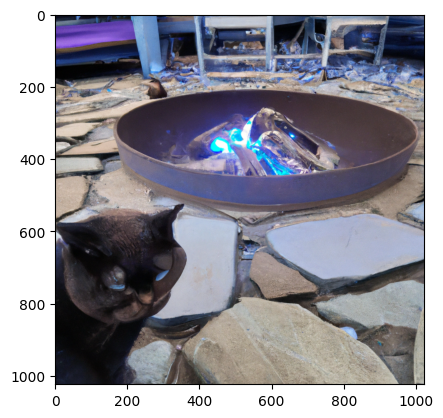

In [19]:
plt.imshow(img)